<a href="https://colab.research.google.com/github/pditi5/Cyberbullying-Detection-Text-Classification-/blob/main/Cyberbullying_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install nltk
import nltk



In [34]:
import sys
sys.setrecursionlimit(17000)

In [35]:
df=pd.read_csv("/content/twitter_parsed_dataset.csv", encoding='utf-8')
df

,index,id,Text,Annotation,oh_label
0,5.74948705591165E+017,5.74948705591165E+017,@halalflaws @biebervalue @greenlinerzjm I read...,none,0.0
1,5.71917888690393E+017,5.71917888690393E+017,@ShreyaBafna3 Now you idiots claim that people...,none,0.0
2,3.90255841338601E+017,3.90255841338601E+017,"RT @Mooseoftorment Call me sexist, but when I ...",sexism,1.0
3,5.68208850655916E+017,5.68208850655916E+017,"@g0ssipsquirrelx Wrong, ISIS follows the examp...",racism,1.0
4,5.75596338802373E+017,5.75596338802373E+017,#mkr No No No No No No,none,0.0
...,...,...,...,...,...
16846,5.75606766236475E+017,5.75606766236475E+017,"Feeling so sorry for the girls, they should be...",none,0.0
16847,5.72333822886326E+017,5.72333822886326E+017,#MKR 'pretty good dishes we're happy with' - O...,none,0.0
16848,5.72326950057845E+017,5.72326950057845E+017,RT @colonelkickhead: Deconstructed lemon tart!...,none,0.0
16849,5.74799612642357E+017,5.74799612642357E+017,@versacezaynx @nyazpolitics @greenlinerzjm You...,none,0.0


In [36]:
df.head(5)

,index,id,Text,Annotation,oh_label
0,5.74948705591165E+017,5.74948705591165E+017,@halalflaws @biebervalue @greenlinerzjm I read...,none,0.0
1,5.71917888690393E+017,5.71917888690393E+017,@ShreyaBafna3 Now you idiots claim that people...,none,0.0
2,3.90255841338601E+017,3.90255841338601E+017,"RT @Mooseoftorment Call me sexist, but when I ...",sexism,1.0
3,5.68208850655916E+017,5.68208850655916E+017,"@g0ssipsquirrelx Wrong, ISIS follows the examp...",racism,1.0
4,5.75596338802373E+017,5.75596338802373E+017,#mkr No No No No No No,none,0.0


In [37]:
df.shape

(16851, 5)

In [38]:
df.columns.to_list()

['index', 'id', 'Text', 'Annotation', 'oh_label']

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16851 entries, 0 to 16850
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       16851 non-null  object 
 1   id          16850 non-null  object 
 2   Text        16850 non-null  object 
 3   Annotation  16848 non-null  object 
 4   oh_label    16848 non-null  float64
dtypes: float64(1), object(4)
memory usage: 658.4+ KB


In [40]:
df.describe()

,oh_label
count,16848.000000
mean,0.317367
std,0.465465
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [41]:
df.isnull().sum()

index         0
id            1
Text          1
Annotation    3
oh_label      3
dtype: int64

dropping null values

In [42]:
df.dropna(inplace=True)

Removing any special characters, URLs, or unnecessary symbols from the text which will help in standardizing the text data.

In [43]:
nltk.download('punkt')
df=df['Text'] = df['Text'].str.replace(r'[^a-zA-Z\s]', '').str.replace(r'http\S+', '')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
<ipython-input-43-ebfb9e17c385>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df=df['Text'] = df['Text'].str.replace(r'[^a-zA-Z\s]', '').str.replace(r'http\S+', '')


# 1. EXPLORATORY DATA ANALYSIS

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
df = pd.read_csv("/content/twitter_parsed_dataset.csv")

In [3]:
df.dropna(inplace=True)
df['Text'] = df['Text'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stopwords.words('english')]))

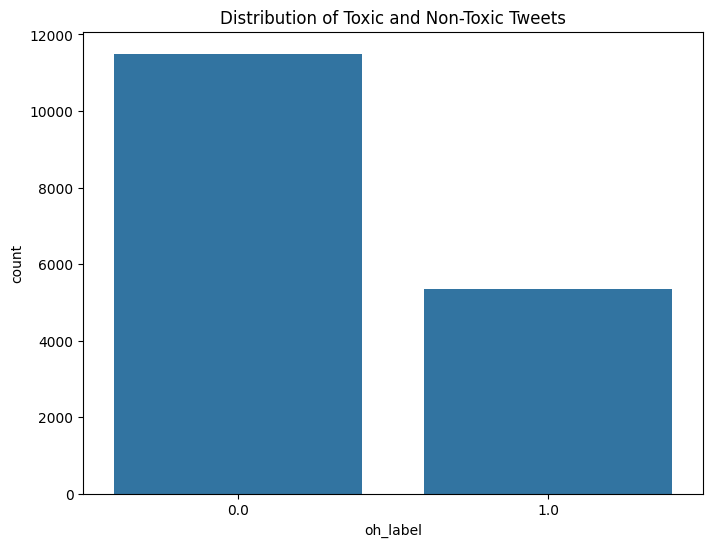

In [4]:
plt.figure(figsize=(8, 6))
sns.countplot(x='oh_label', data=df)
plt.title('Distribution of Toxic and Non-Toxic Tweets')
plt.show()

Creating a word cloud for toxic tweets

In [5]:
toxic_tweets = df[df['oh_label'] == 1]['Text'].values
wordcloud = WordCloud(width=800, height=400, max_words=150, background_color='white').generate(' '.join(toxic_tweets))

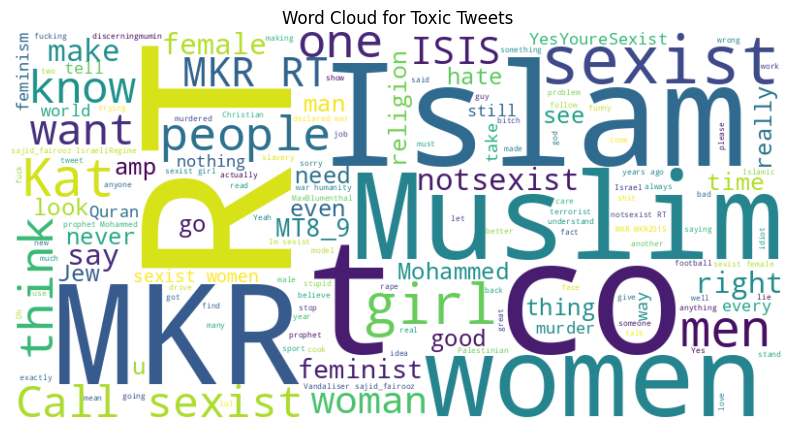

In [6]:
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Toxic Tweets')
plt.show()

###  Text Vectorization (using TF-IDF)

In [8]:
df.to_csv("preprocessed_data.csv", index=False)

# 2. Text Vectorization Modelling

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [10]:
df = pd.read_csv("preprocessed_data.csv")

splitting the dataset into training and testing

In [11]:
X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['oh_label'], test_size=0.2, random_state=42)


In [12]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


In [13]:
model = LogisticRegression(random_state=42)
model.fit(X_train_tfidf, y_train)

LogisticRegression(random_state=42)

In [14]:
y_pred = model.predict(X_test_tfidf)

In [15]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.95      0.89      2306
         1.0       0.83      0.60      0.70      1064

    accuracy                           0.84      3370
   macro avg       0.84      0.77      0.79      3370
weighted avg       0.84      0.84      0.83      3370



In [16]:

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[2180  126]
 [ 428  636]]


# 3. Model Evaluation

In [18]:
from sklearn.metrics import classification_report, confusion_matrix
import joblib


In [19]:
joblib.dump(model, 'trained_model.joblib')

['trained_model.joblib']

In [20]:
df = pd.read_csv("preprocessed_data.csv")

In [21]:
X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['oh_label'], test_size=0.2, random_state=42)

In [23]:
model = joblib.load("/content/trained_model.joblib")

In [24]:
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [25]:
y_pred = model.predict(X_test_tfidf)

In [26]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.95      0.89      2306
         1.0       0.83      0.60      0.70      1064

    accuracy                           0.84      3370
   macro avg       0.84      0.77      0.79      3370
weighted avg       0.84      0.84      0.83      3370



In [27]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[2180  126]
 [ 428  636]]


In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred = model.predict(X_test_tfidf)

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Calculate Precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")

# Calculate Recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1:.4f}")


Accuracy: 0.8356
Precision: 0.8346
Recall: 0.5977
F1-Score: 0.6966


In [30]:
from sklearn.ensemble import RandomForestClassifier
# Train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_tfidf, y_train)

# Predictions
rf_predictions = rf_model.predict(X_test_tfidf)

# Evaluate the Random Forest model
rf_f1 = f1_score(y_test, rf_predictions)
print(f"Random Forest F1-Score: {rf_f1:.4f}")


Random Forest F1-Score: 0.7500


An F1-score of 0.7500 for the Random Forest model is an improvement from the previous Logistic Regression model

In [31]:
import xgboost as xgb


# Train XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train_tfidf, y_train)

# Predictions
xgb_predictions = xgb_model.predict(X_test_tfidf)

# Evaluate the XGBoost model
xgb_f1 = f1_score(y_test, xgb_predictions)
print(f"XGBoost F1-Score: {xgb_f1:.4f}")


XGBoost F1-Score: 0.7024


XGBoost F1-Score: 0.7024 - A balanced measure of precision and recall, indicating good model performance

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenizing and pad the text data
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df['Text'])
X_sequences = tokenizer.texts_to_sequences(df['Text'])
X_padded = pad_sequences(X_sequences)

# Splitting the dataset into training and testing sets
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(X_padded, df['oh_label'], test_size=0.2, random_state=42)

# Building a LSTM model
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=5000, output_dim=128, input_length=X_padded.shape[1]))
lstm_model.add(LSTM(100))
lstm_model.add(Dense(1, activation='sigmoid'))

lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training LSTM model
lstm_model.fit(X_train_lstm, y_train_lstm, epochs=5, batch_size=64, validation_data=(X_test_lstm, y_test_lstm))

# Evaluating the LSTM model
lstm_predictions = (lstm_model.predict(X_test_lstm) > 0.5).astype(int).flatten()
lstm_f1 = f1_score(y_test_lstm, lstm_predictions)
print(f"LSTM F1-Score: {lstm_f1:.4f}")


Epoch 1/5
211/211 [==============================] - 23s 93ms/step - loss: 0.4418 - accuracy: 0.7975 - val_loss: 0.3741 - val_accuracy: 0.8362
Epoch 2/5
211/211 [==============================] - 12s 58ms/step - loss: 0.2899 - accuracy: 0.8815 - val_loss: 0.3741 - val_accuracy: 0.8454
Epoch 3/5
211/211 [==============================] - 17s 83ms/step - loss: 0.2315 - accuracy: 0.9099 - val_loss: 0.3815 - val_accuracy: 0.8347
Epoch 4/5
211/211 [==============================] - 15s 70ms/step - loss: 0.1844 - accuracy: 0.9309 - val_loss: 0.4466 - val_accuracy: 0.8315
Epoch 5/5
106/106 [==============================] - 1s 10ms/step
LSTM F1-Score: 0.7164


# Cyberbullying Detection Project Summary 🕵️‍♂️📊

In the above project and models:

1. **Logistic Regression:** Achieved a solid F1-Score of 0.6966.
2. **Random Forest:** Stands out with the highest F1-Score of 0.7500.
3. **XGBoost:** Demonstrates a competitive F1-Score of 0.7024.
4. **LSTM:** Shows promising results with an F1-Score of 0.7164.

🚀 The Random Forest model emerges as a top performer, indicating robust capabilities in cyberbullying detection. Consider further fine-tuning based on specific project requirements.

